In [1]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append('/mnt/fishbowl/gomer/oline/hamer_pkl')
sys.path.append('/mnt/fishbowl/gomer/oline/sb_uva/supplement/5m/hamer_pkl')
import os
print(os.getcwd())
import os
print(os.path.exists('/mnt/fishbowl/gomer/oline/hamer_pkl'))

/home/gomer/oline/PoseTools/src/modules/handshapes/utils/build_references
True


In [ ]:
import pandas as pd
import json, os
from cluster import cluster_frames, plot_clustered_poses, save_selected_clusters_to_json,get_unique_glosses_per_label
pd.options.mode.chained_assignment = None  # Turn off the warning

handshape = '5m'
k = 20
pkl_subdirectory = '/mnt/fishbowl/gomer/oline/hamer_pkl' #'/mnt/fishbowl/gomer/oline/sb_uva/supplement/5m/hamer_pkl'#
from load_data import load_metadata, load_pose_data

df_meta = load_metadata(pkl_subdirectory, exclude_rad = True)

df_subset = df_meta[df_meta['Strong Hand'] == handshape]
#new_row = pd.DataFrame({
#    'Annotation ID Gloss: Dutch': ['IPAD-C'],  # List format
#    'Affiliation': ['UvA'],
#    'Handedness': ['-'],
#    'Link': ['-'],
#    'Strong Hand': ['-'],
#    'Weak Hand': ['-']
#})

#df_subset = pd.concat([df_subset, new_row], ignore_index=True).copy()

print(df_subset)
frames, gloss_labels = load_pose_data(df_subset)
assert len(frames) == len(gloss_labels)
print(len(frames))
print(set(gloss_labels))

     Annotation ID Gloss: Dutch Affiliation Handedness  \
5691               SPIDER-MAN-A       [UvA]          1   
6601            HAAT-OP-PERSOON       [UvA]          1   

                                                   Link Strong Hand Weak Hand  
5691  https://signbank.cls.ru.nl//dictionary/gloss/4...          5m        -1  
6601  https://signbank.cls.ru.nl//dictionary/gloss/4...          5m         B  
  Annotation ID Gloss: Dutch Affiliation Handedness  \
0               SPIDER-MAN-A       [UvA]          1   
1            HAAT-OP-PERSOON       [UvA]          1   
2                     IPAD-C         UvA          -   
3            BLOOT-LICHAAM-A         UvA          -   

                                                Link Strong Hand Weak Hand  
0  https://signbank.cls.ru.nl//dictionary/gloss/4...          5m        -1  
1  https://signbank.cls.ru.nl//dictionary/gloss/4...          5m         B  
2                                                  -           -         -  
3

Loading frames: 100%|██████████| 8/8 [00:00<00:00, 32482.51it/s]

540
{'IPAD-C', 'SPIDER-MAN-A', 'HAAT-OP-PERSOON', 'BLOOT-LICHAAM-A'}


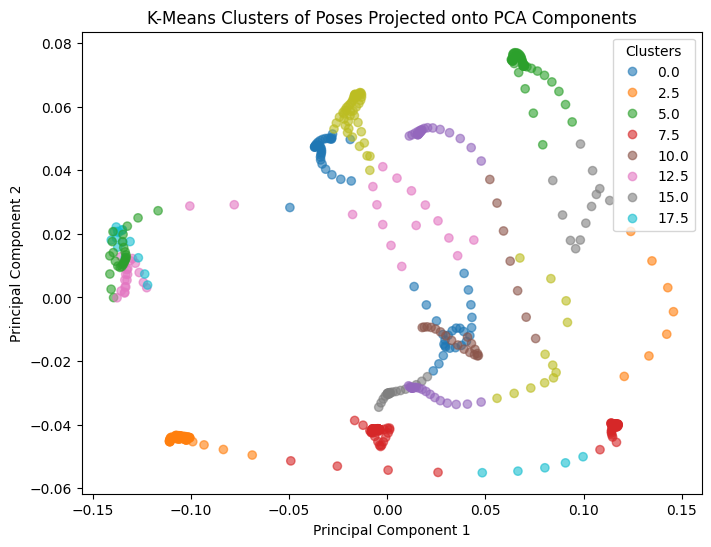

In [16]:
from cluster import cluster_frames, plot_clustered_poses, save_selected_clusters_to_json,get_unique_glosses_per_label

labels, videos_per_cluster = cluster_frames(frames, gloss_labels, k)

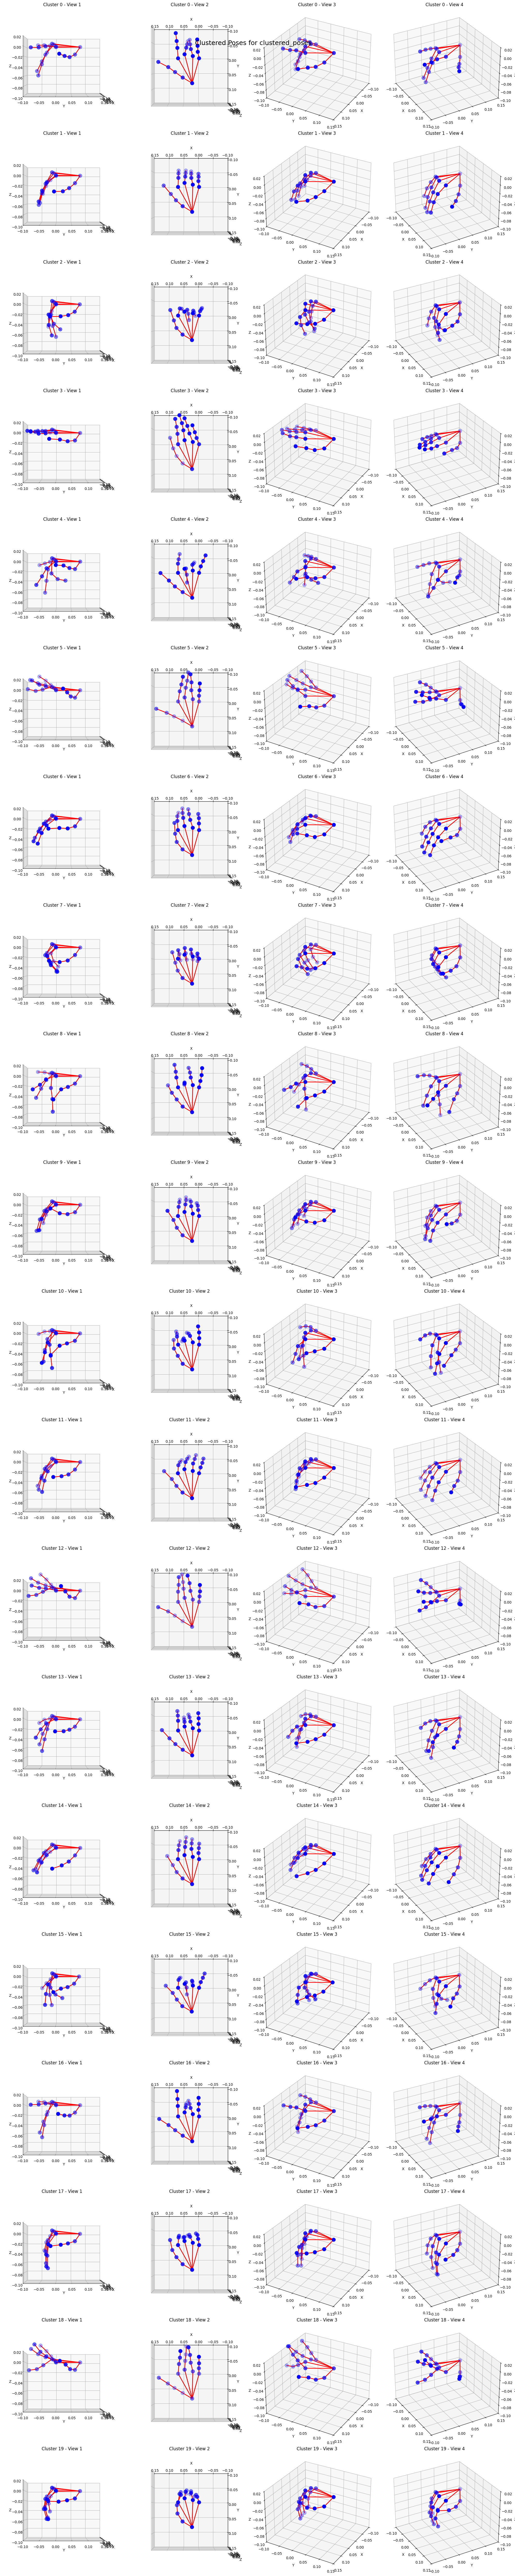

In [17]:
avg_poses = plot_clustered_poses(frames, labels, output_file_name='clustered_poses', handshape=handshape)


## Save File

In [ ]:
selected_labels_1 = [0]  # Replace with your desired cluster labels
output_file_name = '/home/gomer/oline/PoseTools/src/modules/handshapes/utils/build_references/reference_data/finals/poses/' + handshape +'_avg_pose.json'

def prepare_new_pose(selected_labels_1, output_file_name):

    get_unique_glosses_per_label(videos_per_cluster, selected_labels_1)

    # Call the function to save the selected clusters
    selected_avg_clusters = save_selected_clusters_to_json(avg_poses, selected_labels_1, output_file_name)
    return selected_avg_clusters

#selected_avg_clusters = prepare_new_pose(selected_labels_1, output_file_name)

from pdm import prepare_new_pdm

#output_file_name = '/home/gomer/oline/PoseTools/src/modules/handshapes/utils/build_references/reference_data/finals/pdm/' + handshape +'_avg_pdm.json'
#prepare_new_pdm(selected_avg_clusters, handshape, output_file_name)


Cluster 0 built on 49 videos.
['TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B', 'TROUWEN-B']
Selected clusters saved to /home/gomer/oline/PoseTools/src/modules/handshapes/utils/build_references/reference_data/finals/poses/T_open_avg_pose.json
Distance matrices saved to /home/gomer/oline/PoseTools/src/modules/handshapes/utils/build_references/reference_data/finals/pdm/T_open_avg_pdm.json


In [18]:
import json
import os
import numpy as np

def pairwise_distance_matrix(points):
    num_points = points.shape[0]
    dist_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i, num_points):
            dist = np.linalg.norm(points[i] - points[j])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    max_distance = np.max(dist_matrix)
    return dist_matrix / max_distance if max_distance > 0 else dist_matrix

def update_selected_clusters_and_pdm_in_json(avg_poses, selected_labels, avg_pose_output_file, pdm_output_file):
    """
    Update the existing JSON files with selected clusters and their distance matrices.

    Parameters:
    - avg_poses: dict mapping cluster labels to average poses (NumPy arrays).
    - selected_labels: list of cluster labels to include in the output.
    - avg_pose_output_file: path to the average poses JSON file to update.
    - pdm_output_file: path to the PDM JSON file to update.

    Returns:
    - selected_avg_clusters: dict of selected average poses.
    """
    # Initialize selected clusters dicts
    selected_avg_clusters = {}
    selected_distance_matrices = {}

    # Prepare the new data to add
    for label in selected_labels:
        if label in avg_poses:
            avg_pose = avg_poses[label]
            # Convert the NumPy array to a list for JSON serialization
            avg_pose_list = avg_pose.tolist()
            # Use string keys for JSON compatibility
            label_str = str(label)
            selected_avg_clusters[label_str] = avg_pose_list

            # Calculate the distance matrix
            dist_matrix = pairwise_distance_matrix(avg_pose)
            dist_matrix_list = dist_matrix.tolist()
            selected_distance_matrices[label_str] = dist_matrix_list
        else:
            print(f"Warning: Cluster label {label} not found in avg_poses.")

    # Update the average poses JSON file
    # Load existing data if the file exists
    if os.path.exists(avg_pose_output_file):
        with open(avg_pose_output_file, 'r') as json_file:
            existing_data_avg_pose = json.load(json_file)
    else:
        existing_data_avg_pose = {}

    # Update existing data with new selected clusters
    existing_data_avg_pose.update(selected_avg_clusters)

    # Save the updated data back to the JSON file
    with open(avg_pose_output_file, 'w') as json_file:
        json.dump(existing_data_avg_pose, json_file, indent=4)

    print(f"Selected clusters updated in {avg_pose_output_file}")

    # Update the PDM JSON file
    # Load existing data if the file exists
    if os.path.exists(pdm_output_file):
        with open(pdm_output_file, 'r') as json_file:
            existing_data_pdm = json.load(json_file)
    else:
        existing_data_pdm = {}

    # Update existing data with new distance matrices
    existing_data_pdm.update(selected_distance_matrices)

    # Save the updated data back to the JSON file
    with open(pdm_output_file, 'w') as json_file:
        json.dump(existing_data_pdm, json_file, indent=4)

    print(f"Distance matrices updated in {pdm_output_file}")

    return selected_avg_clusters

avg_pose_output_file = 'reference_data/finals/poses/' + handshape + '_avg_pose.json'
pdm_output_file = 'reference_data/finals/pdm/' + handshape + '_avg_pdm.json'
selected_labels = [ 4, 8, 10,  18] #13
# Call the updated function
selected_avg_clusters = update_selected_clusters_and_pdm_in_json(avg_poses, selected_labels, avg_pose_output_file, pdm_output_file)


Selected clusters updated in reference_data/finals/poses/5m_avg_pose.json
Distance matrices updated in reference_data/finals/pdm/5m_avg_pdm.json


## Convert to PDM

In [172]:
print(len(['Q', 'C_spread', 'M', 'P', 'A', 'I', 'Beak_open_spread', 'Y', '1', 'N', '5r', 'C2_spread', 'Baby_C', '5m_closed', 'ILY', 'C', 'Beak', 'O', '5m', 'K', 'V_curved', 'Beak_spread', 'B', 'D', 'Baby_beak_open', 'Money', 'Baby_beak', '5', 'L2', 'L', 'R', '3', 'T', '5r_closed', '4', 'Beak_open', 'V', 'Baby_O', '1_curved', 'Beak2_open_spread', 'Horns', 'W', 'S', 'E', 'Flower']))

45


In [ ]:
df_1 = df_meta[df_meta['Strong Hand'] == '1']
print(df_1['Link'].values)

['https://signbank.cls.ru.nl//dictionary/gloss/3811'
 'https://signbank.cls.ru.nl//dictionary/gloss/2442'
 'https://signbank.cls.ru.nl//dictionary/gloss/533'
 'https://signbank.cls.ru.nl//dictionary/gloss/2578'
 'https://signbank.cls.ru.nl//dictionary/gloss/4042'
 'https://signbank.cls.ru.nl//dictionary/gloss/2364'
 'https://signbank.cls.ru.nl//dictionary/gloss/375'
 'https://signbank.cls.ru.nl//dictionary/gloss/2653'
 'https://signbank.cls.ru.nl//dictionary/gloss/266'
 'https://signbank.cls.ru.nl//dictionary/gloss/2860'
 'https://signbank.cls.ru.nl//dictionary/gloss/3537'
 'https://signbank.cls.ru.nl//dictionary/gloss/389'
 'https://signbank.cls.ru.nl//dictionary/gloss/1089'
 'https://signbank.cls.ru.nl//dictionary/gloss/2690'
 'https://signbank.cls.ru.nl//dictionary/gloss/1682'
 'https://signbank.cls.ru.nl//dictionary/gloss/1041'
 'https://signbank.cls.ru.nl//dictionary/gloss/345'
 'https://signbank.cls.ru.nl//dictionary/gloss/2657'
 'https://signbank.cls.ru.nl//dictionary/gloss/952'

In [ ]:
import pickle

gloss = 'WISSELKOERS'
gloss = 'KOMPAS'
letter = 'L'
filename = 'hamer_pkl/'+gloss+'-'+letter+'.pkl'
filtered_row = df_1[df_1['Annotation ID Gloss: Dutch'] == gloss]
filtered_row = df_meta[df_meta['Annotation ID Gloss: Dutch'] == gloss]
print(filtered_row['Link'].values)

with open(filename, 'rb') as file:
    data = pickle.load(file)['keypoints']

print(data.shape)


['https://signbank.cls.ru.nl//dictionary/gloss/47197']


FileNotFoundError: [Errno 2] No such file or directory: 'hamer_pkl/KOMPAS-L.pkl'

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Step 1: Load the pickle file


# Step 3: Define plotting parameters
inward_edges = [
    [1, 0], [2, 1], [3, 2], [4, 3],    # Thumb
    [5, 0], [6, 5], [7, 6], [8, 7],    # Index Finger
    [9, 0], [10, 9], [11, 10], [12, 11],  # Middle Finger
    [13, 0], [14, 13], [15, 14], [16, 15],  # Ring Finger
    [17, 0], [18, 17], [19, 18], [20, 19]   # Pinky Finger
]

angles = [[0, 0], [30, -30], [30, -60], [90, 90]]

# Step 4: Initialize variables
pred_top1 = []
pred_top3 = []
pred_top5 = []
idxs = []
frames = []
plot = True  # Set to True to generate plots
handedness = '2a'  # Modify as per your data
strong = 'Right'   # Modify as per your data
weak = 'Left'      # Modify as per your data
output_gif_path = f'reference_gifs/{gloss}-{letter}.gif'

# Step 7: Loop through frames and plot
for frame in data:
    centered_frame = frame - frame[0]  # Center the frame

    fig = plt.figure(figsize=(10, 8))
    for idx_angle, angle in enumerate(angles):
        ax = fig.add_subplot(2, 2, idx_angle + 1, projection='3d')

        x, y, z = centered_frame[:, 0], centered_frame[:, 1], centered_frame[:, 2]
        ax.scatter(x, y, z, c='b', s=20)

        for edge in inward_edges:
            start, end = edge
            ax.plot(
                [x[start], x[end]],
                [y[start], y[end]],
                [z[start], z[end]],
                'r-'
            )

        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_xlim([-0.1, 0.15])
        ax.set_ylim([-0.2, 0.01])
        ax.set_zlim([-0.1, 0.05])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f"Angle: {angle[0]}°, {angle[1]}°")

    fig.suptitle(
        f'{filename} - Hnd: {handedness}, Strong: {strong}, Weak: {weak}\n'
    )

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)

    plt.close(fig)

# Step 8: Save the animation
if plot and frames:
    imageio.mimsave(output_gif_path, frames, fps=5, loop = 0)
    print(f"Animation saved as {output_gif_path}")


/tmp/ipykernel_236927/2344845321.py:66: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


Animation saved as reference_gifs/KOMPAS-L.gif
